In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

datos = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
datos.head(40)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [3]:
# Definir variables independientes y dependiente
X = datos[['year', 'km_driven', 'seller_type', 'fuel']]  # Agregando 'fuel'
y = datos['selling_price']


In [4]:
# Manejar valores atípicos (opcional)
q1 = datos['selling_price'].quantile(0.25)
q3 = datos['selling_price'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
datos_filtrados = datos[(datos['selling_price'] >= limite_inferior) & (datos['selling_price'] <= limite_superior)]

# Redefinir variables con datos filtrados
X = datos_filtrados[['year', 'km_driven', 'seller_type', 'fuel']]
y = datos_filtrados['selling_price']


In [5]:
# Preprocesar variables
categorical_features = ['seller_type', 'fuel']  # Agregando 'fuel'
numeric_features = ['year', 'km_driven']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numeric_features)  # Normalizar variables numéricas
])


In [6]:
# Crear el pipeline con XGBoost
modelo = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regression', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Optimización de hiperparámetros
param_grid = {
    'regression__n_estimators': [100, 200],
    'regression__max_depth': [3, 5, 7],
    'regression__learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\frank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\frank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\frank\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\frank\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\frank\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _

In [8]:
# Hacer predicciones
predicciones = mejor_modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
mae = mean_absolute_error(y_test, predicciones)  # Agregando MAE

print(f'Error Cuadrático Medio: {mse}')
print(f'R²: {r2}')
print(f'Error Absoluto Medio: {mae}')  # Imprimir MAE

Error Cuadrático Medio: 31428977948.08701
R²: 0.4575375574526832
Error Absoluto Medio: 137556.32699247543


In [9]:
# Validación cruzada
cv_scores = cross_val_score(mejor_modelo, X, y, cv=5, scoring='r2')
print(f'Scores de Validación Cruzada: {cv_scores}')
print(f'Promedio de Validación Cruzada: {cv_scores.mean()}')

Scores de Validación Cruzada: [0.45796197 0.49569707 0.42963338 0.43809677        nan]
Promedio de Validación Cruzada: nan


C:\Users\frank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\frank\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\frank\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\frank\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\frank\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\frank\anaconda3\Lib\site-packages\skle

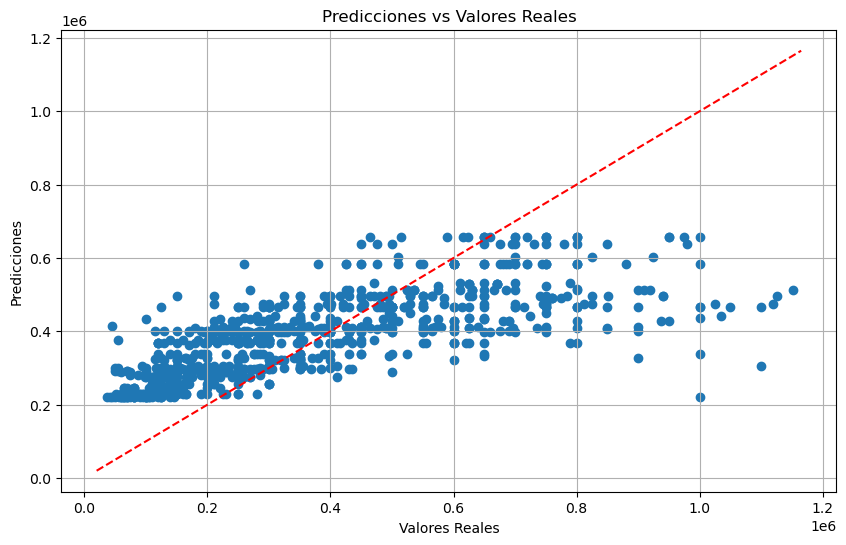

In [10]:
# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Línea de referencia
plt.grid()
plt.show()

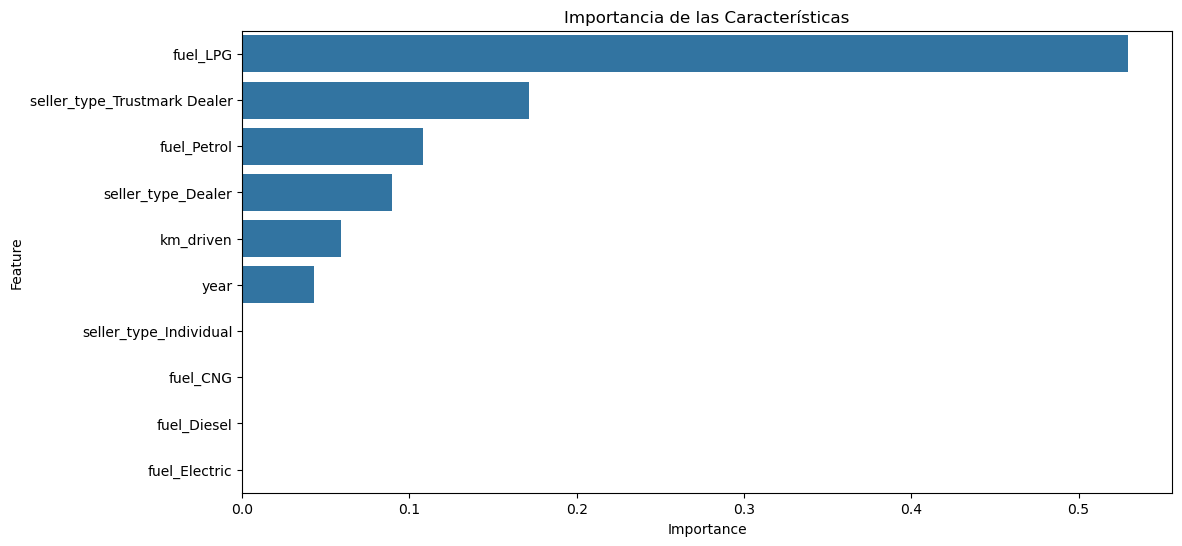

In [11]:
# Importancia de características
importances = mejor_modelo.named_steps['regression'].feature_importances_
features = np.concatenate((numeric_features, 
                           mejor_modelo.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()))
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.show()